EOmaps example 3: Customize the appearance of the plot

In [2]:
%matplotlib widget
from eomaps import Maps
import pandas as pd
import numpy as np

In [3]:
# ----------- create some example-data
lon, lat = np.meshgrid(np.arange(-30, 60, 0.25), np.arange(30, 60, 0.3))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data_variable=np.sqrt(lon**2 + lat**2).flat)
)
data = data.sample(3000)  # take 3000 random datapoints from the dataset


D:\python_modules\eomaps\eomaps\eomaps.py:461: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!
  "EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') "


EOmaps: Parameter was set to: 'data_variable'


D:\python_modules\eomaps\eomaps\eomaps.py:1146: UserWarning: EOmaps: classification bins outside of value-range... bins have been updated!
  "EOmaps: classification bins outside of value-range..."


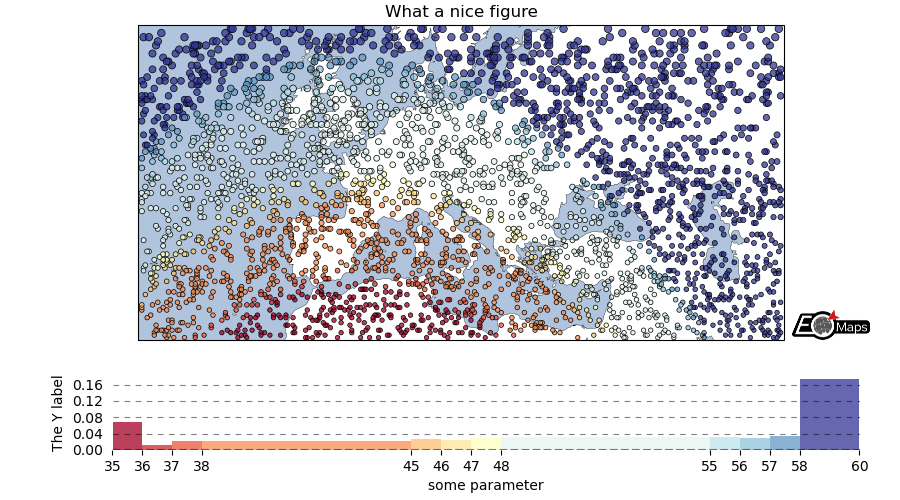

In [4]:
m = Maps(
    crs=3857, figsize=(9, 5)
)  # create a map in a pseudo-mercator (epsg 3857) projection
m.add_feature.preset.ocean(fc="lightsteelblue")
m.add_feature.preset.coastline(lw=0.25)
m.set_data(data=data, xcoord="lon", ycoord="lat", in_crs=4326)

# --------- set the appearance of the plot
m.set_plot_specs(
    label="some parameter",  # set the label of the colorbar
    cmap="RdYlBu",  # set the colormap
    histbins="bins",  # use the histogram-bins as set by the classification scheme
    vmin=35,  # set all values below vmin to vmin
    vmax=60,  # set all values above vmax to vmax
    cpos="c",  # the pixel-coordinates represent the "center-position"
    cpos_radius=None,  # radius (in in_crs) to shift the center-position if "cpos" is not "c"
    alpha=0.75,  # add some transparency
    density=True,  # make the histogram values represent the "probability-density"
)
m.ax.set_title("What a nice figure")
m.set_shape.geod_circles(radius=30000)  # plot geodesic-circles with 30 km radius

# set the classification scheme that should be applied to the data
m.set_classify_specs(
    scheme="UserDefined", bins=[35, 36, 37, 38, 45, 46, 47, 48, 55, 56, 57, 58]
)

m.plot_map(
    edgecolor="k", linewidth=0.5
)  # pass some additional arguments to the plotted collection

# ------------------ add a colorbar and change it's appearance
m.add_colorbar()
_ = m.figure.ax_cb_plot.set_ylabel("The Y label")  # add a y-label to the histogram

m.figure.gridspec.update(
    bottom=0.1, top=0.95, left=0.075, right=0.95, hspace=0.2
)  # adjust the padding
m.figure.set_colorbar_position(
    pos=[0.125, 0.1, 0.83, 0.15], ratio=999
)  # manually re-position the colorbar

m.add_logo(position="lr", pad=(-1.1, 0))